Download https://github.com/RyanrDavies/curvytron-client and cd to it

In [1]:
%cd /home/james/git/forks/curvytron-client

/home/james/git/forks/curvytron-client


In [2]:
import threading
import curvytron
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

Start a curvytron server and point to its address (can use curvytron.com)

In [3]:
serveraddress = "129.215.91.49:8080"

Random policy

In [4]:
env = curvytron.CurvytronEnv(server=serveraddress, room='room', name='bill')

Since the player moves randomly, you may need to run this a few times to see trails

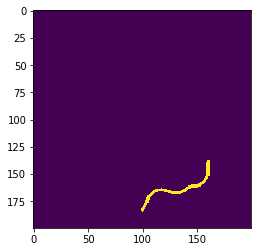

Episode finished after 47 steps
Killing player (Returns None)


In [5]:
env.reset()
episode_over = False
steps = 0
while not episode_over:
    steps += 1
    action = np.random.choice(3)
    ob, r, episode_over = env.step(action)
    plt.clf()
    ax = plt.imshow(ob.pixels)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    print('Angle={}, Position={}'.format(ob.angle, ob.position), end='\r')
    plt.pause(0.01)
print("Episode finished after {} steps".format(steps))
print("Killing player (Returns {})".format(env.client.join()))

In [6]:
from heuristic_agent import RandomAgent, HeuristicAgent1, HeuristicAgent2

In [7]:
def custom(environment):
    environment.reset()
    episode_over = False
    while not episode_over:
        action = np.random.choice(3)
        ob, r, episode_over = environment.step(action)
        plt.pause(0.005)

In [8]:
agents = [RandomAgent(server=serveraddress, room='multiplayer', name='RandomAgent_{}'.format(ii)) 
                for ii in range(2)]
agents += [HeuristicAgent1(server=serveraddress, room='multiplayer', name='HeuristicAgent1_{}'.format(ii)) 
                for ii in range(2)]
agents += [HeuristicAgent2(server=serveraddress, room='multiplayer', name='HeuristicAgent2_{}'.format(ii)) 
                for ii in range(2)]

Go join the game yourself! **Tip**: If you just want to watch (and not play), join the room and click the x next to your player name.

In [9]:
threads = []
for agent in agents:
    t = threading.Thread(target=agent.start())
    threads.append(t)
    t.start()

In [10]:
for agent in agents:
    agent.env.client.join()  # kills the agent

close status: 23387
